In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/housing_prices - housing_prices.csv')
df.head()

,SquareFootage,Price
0,1100,199000
1,1400,245000
2,1425,230000
3,1550,215000
4,1600,280000


In [3]:
xraw = df.iloc[:, 0].to_numpy(dtype=float)   # area (square feet)
y = df.iloc[:, 1].to_numpy(dtype=float)   # price

In [4]:
#Gradient Descent algorithm
x_mean=np.mean(xraw)
x_std=np.std(xraw)
x_new=(xraw-x_mean)/x_std
m1=0.0
b1=0.0

In [7]:
alpha = 0.06
number_iters = 1800

# Batch Gradient Descent loop
for it in range(number_iters):
    y_hat = m1 * x_new + b1
    error = y_hat - y

    # gradients
    grad_w = np.mean(error * x_new)
    grad_b = np.mean(error)

    # updating
    m1 -= alpha * grad_w
    b1 -= alpha * grad_b

    m_gd = m1 / x_std
    b_gd = b1 - (m1 * x_mean) / x_std

In [9]:
pred_gd = m_gd * 2500 + b_gd
print(f"  Pred (2500): {pred_gd:.2f}")


  Pred (2500): 429560.55


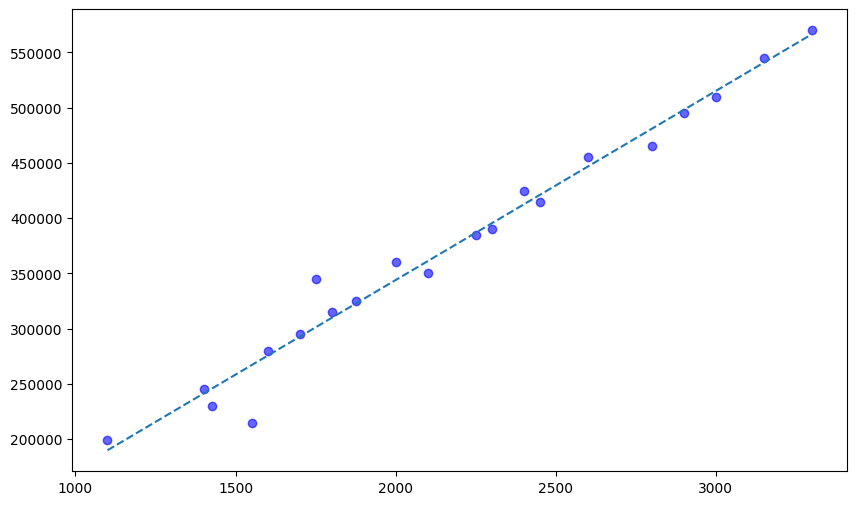

In [12]:
plt.figure(figsize=(10, 6))
xs = np.linspace(min(xraw), max(xraw), 200)
plt.scatter(xraw, y, label="Data", color="blue", alpha=0.6)
plt.plot(xs, m_gd*xs + b_gd, linestyle='--', label="Gradient Descent")
